# Praktische Optimierung Blatt 09
### Tobias Lotz:  217856 <br>
### Alexander van der Staay:  185444

In [111]:
from skopt import Optimizer
from skopt.plots import plot_gaussian_process
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from skopt.space import Real
from sklearn.base import clone
from scipy.stats import norm
from skopt.acquisition import gaussian_lcb, gaussian_ei

In [49]:
LOWER_A = -2
UPPER_A = 2
def fa(x): return np.sin(5 * x[0]) * (1 - np.tanh(x[0]**2))

LOWER_B = -10
UPPER_B = 10
def fb(x): return x[0]**2 - 10 * np.cos(5 * x[0])

### Eigene Implementierung

In [144]:
def my_EI(x, opt, model):
    fmin = opt.get_result().fun
    mu, s = model.predict(x, return_std=True)
    u = (fmin - mu) / s
    return s * (u * norm.cdf(u) + norm.pdf(u))

def my_LCB(x, model, kappa):
    mu, std = model.predict(x, return_std=True)
    return mu - kappa * std

### (a) Grafiken

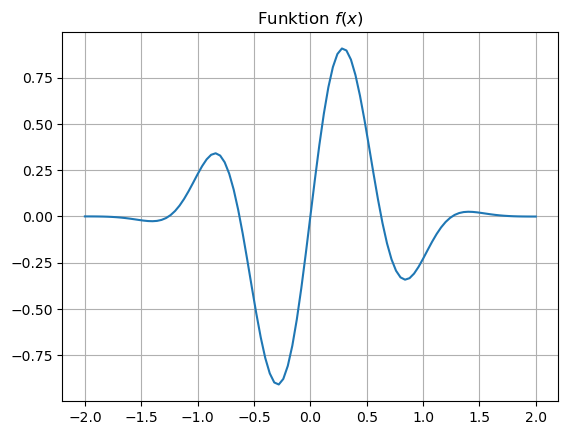

In [125]:
xs = np.linspace(LOWER_A, UPPER_A, 101)

plt.title("Funktion $f(x)$")
plt.plot(xs, np.sin(5 * xs) * (1 - np.tanh(xs**2)))
plt.grid()

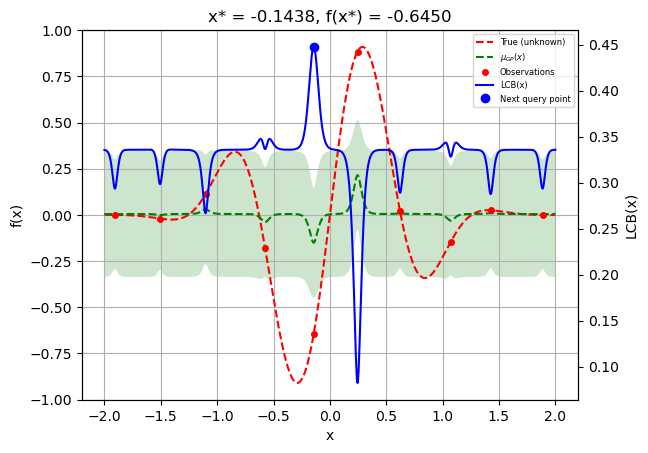

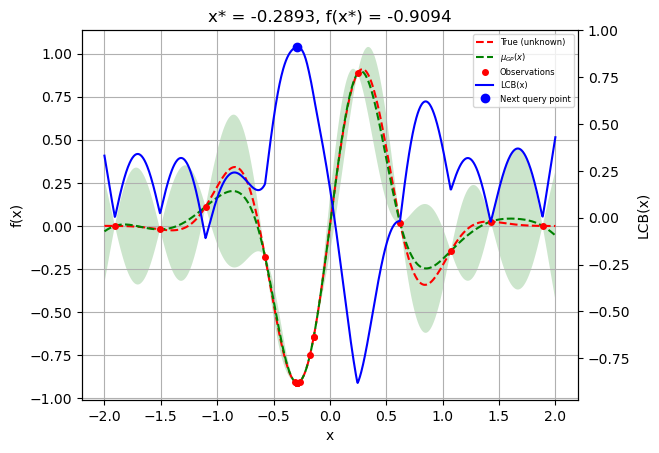

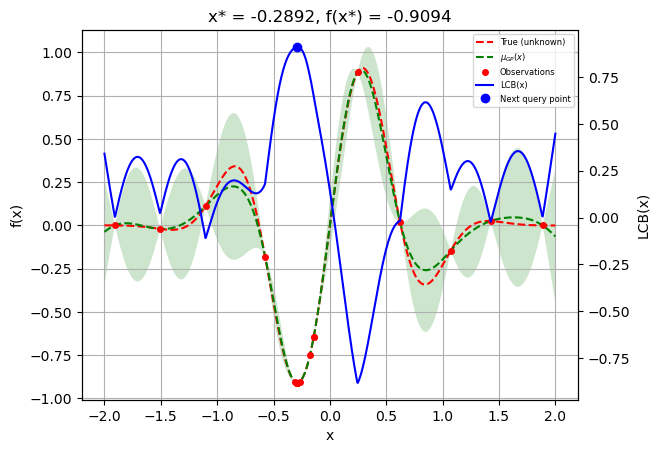

In [103]:
opt = Optimizer(dimensions=[Real(LOWER_A, UPPER_A)], base_estimator='GP', initial_point_generator='lhs',
                acq_func='LCB', random_state=42)

for i in range(1, 31):
    x = opt.ask()
    y = fa(x)
    opt.tell(x, y)
    if i % 10 == 0:
        plot_gaussian_process(opt.get_result(), objective=fa, 
                        show_next_point=True, show_acq_func=True)
        plt.show()        

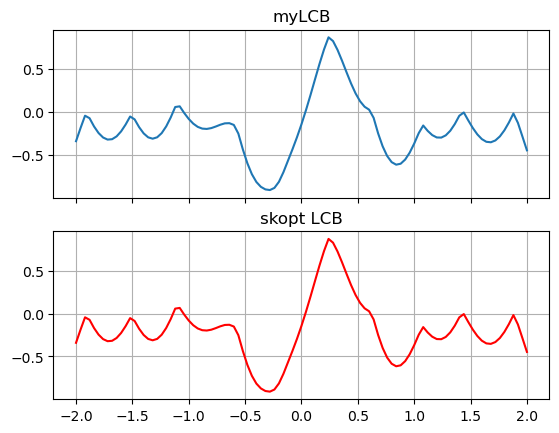

In [123]:
model = clone(opt.base_estimator_)
model.fit(opt.get_result().x_iters, opt.get_result().func_vals)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_title("myLCB")
ax1.set_axisbelow(True)
ax1.grid()
ax1.plot(xs, my_LCB(xs.reshape(101, 1), model, kappa=1.96))
ax2.set_title("skopt LCB")
ax2.set_axisbelow(True)
ax2.grid()
ax2.plot(xs, gaussian_lcb(xs.reshape(101, 1), model), c='red')

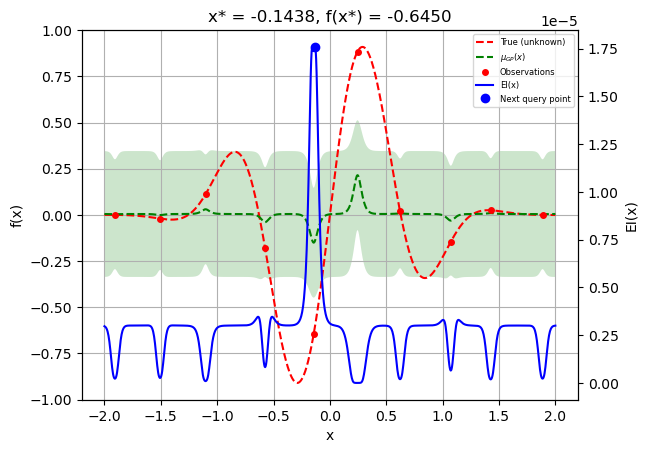

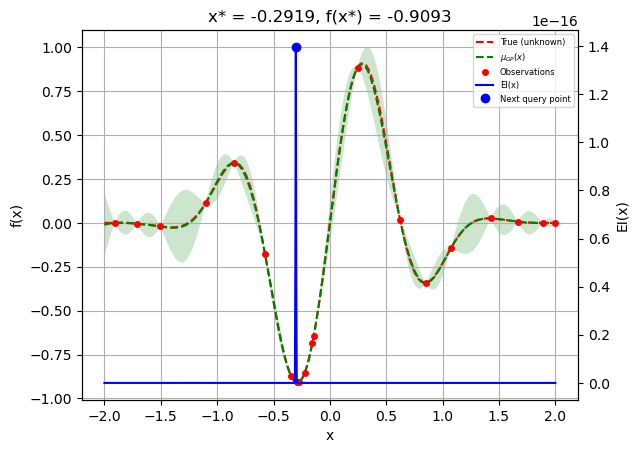

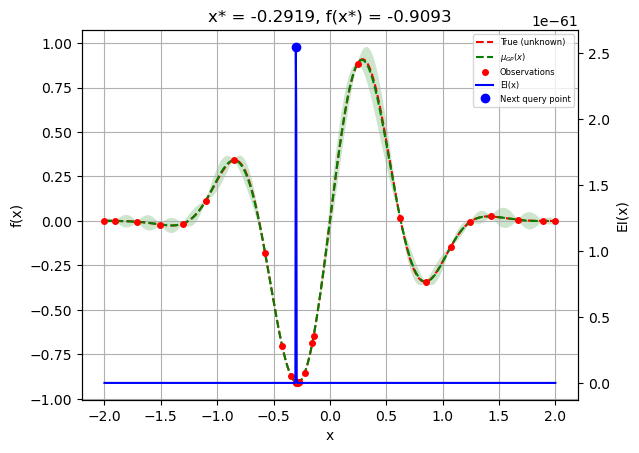

In [133]:
opt = Optimizer(dimensions=[Real(LOWER_A, UPPER_A)], base_estimator='GP', initial_point_generator='lhs',
                acq_func='EI', random_state=42)

for i in range(1, 31):
    x = opt.ask()
    y = fa(x)
    opt.tell(x, y)
    if i % 10 == 0:
        plot_gaussian_process(opt.get_result(), objective=fa, 
                        show_next_point=True, show_acq_func=True)
        plt.show()        

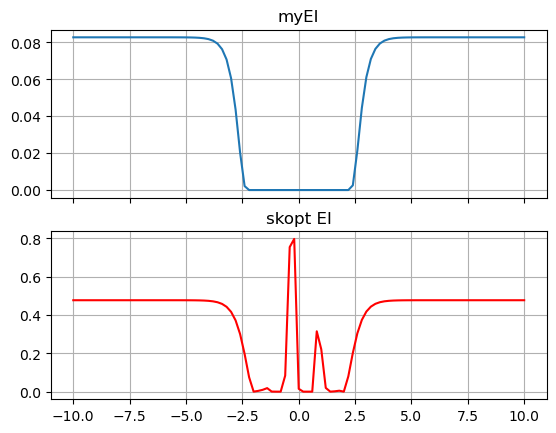

In [143]:
model = clone(opt.base_estimator_)
model.fit(opt.get_result().x_iters, opt.get_result().func_vals)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_title("myEI")
ax1.set_axisbelow(True)
ax1.grid()
ax1.plot(xs, my_EI(xs.reshape(101, 1), opt, model))
ax2.set_title("skopt EI")
ax2.set_axisbelow(True)
ax2.grid()
ax2.plot(xs, gaussian_ei(xs.reshape(101, 1), model), c='red')

### (b) Grafiken

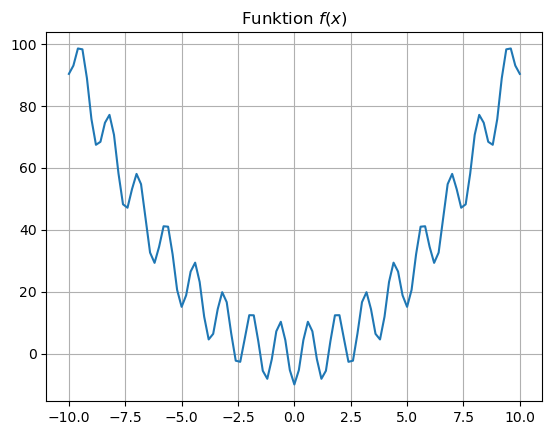

In [126]:
xs = np.linspace(LOWER_B, UPPER_B, 101)

plt.title("Funktion $f(x)$")
plt.plot(xs, xs**2 - 10 * np.cos(5 * xs))
plt.grid()

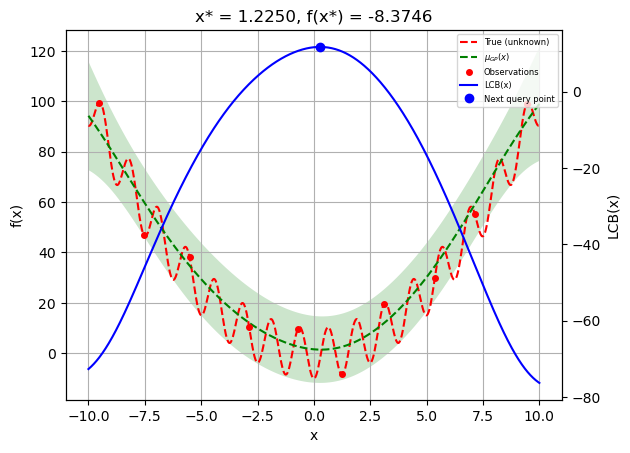

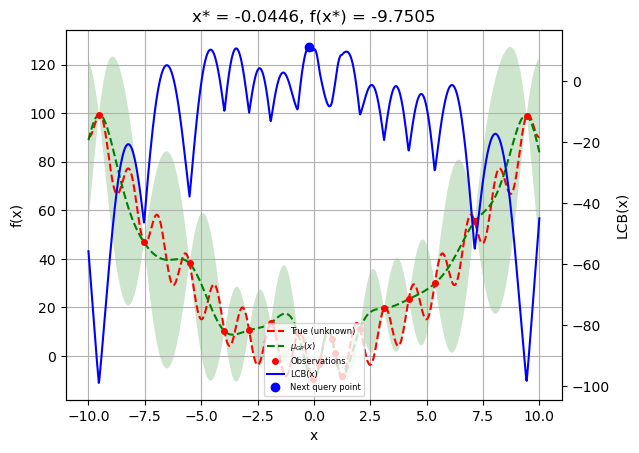

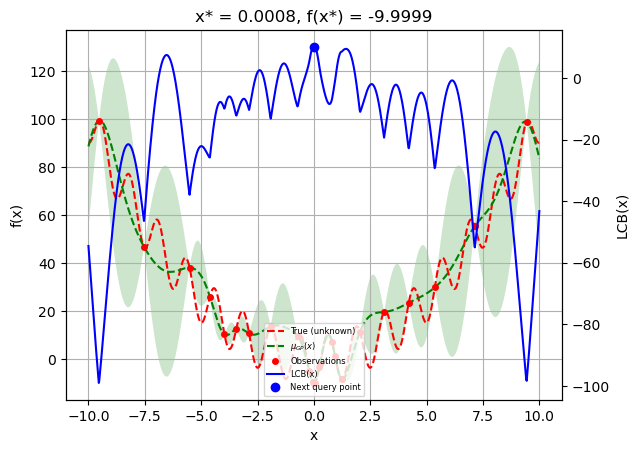

In [145]:
opt = Optimizer(dimensions=[Real(LOWER_B, UPPER_B)], base_estimator='GP', initial_point_generator='lhs',
                acq_func='LCB', random_state=42)

for i in range(1, 31):
    x = opt.ask()
    y = fb(x)
    opt.tell(x, y)
    if i % 10 == 0:
        plot_gaussian_process(opt.get_result(), objective=fb, 
                        show_next_point=True, show_acq_func=True)
        plt.show()        

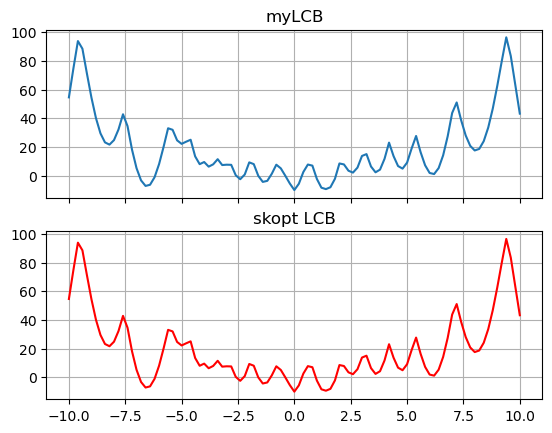

In [131]:
model = clone(opt.base_estimator_)
model.fit(opt.get_result().x_iters, opt.get_result().func_vals)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_title("myLCB")
ax1.set_axisbelow(True)
ax1.grid()
ax1.plot(xs, my_LCB(xs.reshape(101, 1), model, kappa=1.96))
ax2.set_title("skopt LCB")
ax2.set_axisbelow(True)
ax2.grid()
ax2.plot(xs, gaussian_lcb(xs.reshape(101, 1), model), c='red')

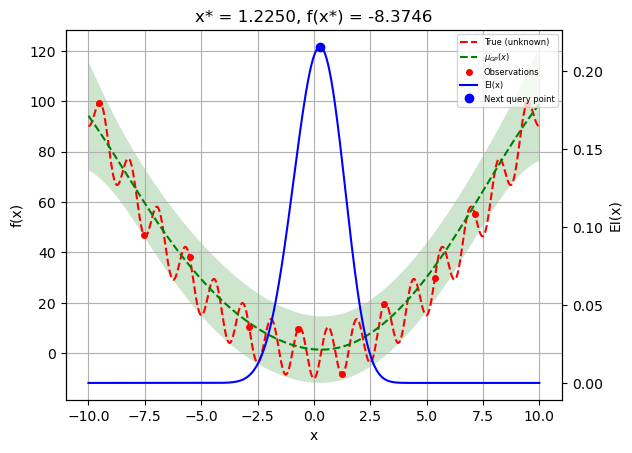

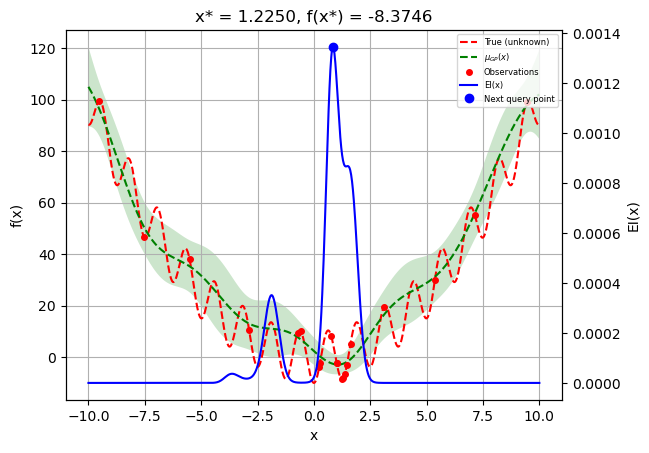

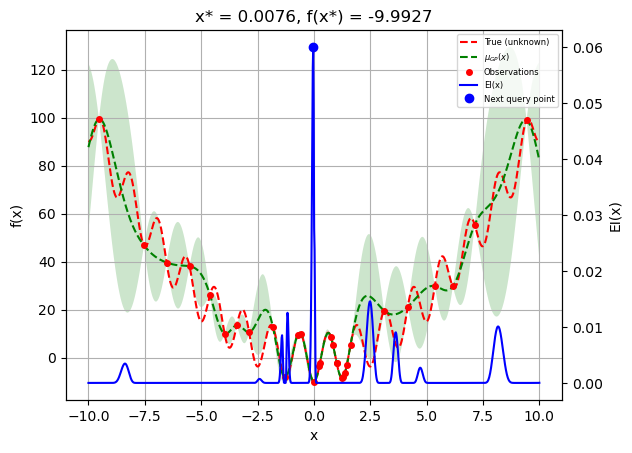

In [146]:
opt = Optimizer(dimensions=[Real(LOWER_B, UPPER_B)], base_estimator='GP', initial_point_generator='lhs',
                acq_func='EI', random_state=42)

for i in range(1, 31):
    x = opt.ask()
    y = fb(x)
    opt.tell(x, y)
    if i % 10 == 0:
        plot_gaussian_process(opt.get_result(), objective=fb, 
                        show_next_point=True, show_acq_func=True)
        plt.show()        

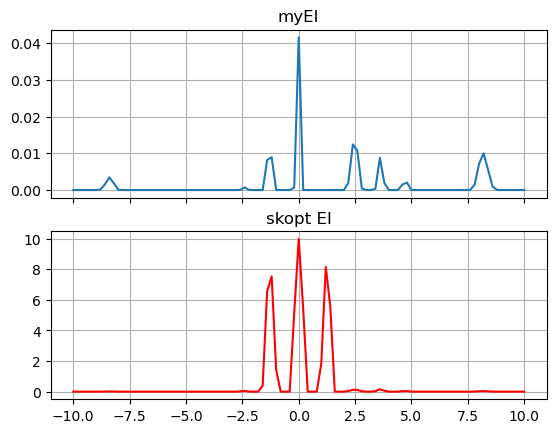

In [148]:
model = clone(opt.base_estimator_)
model.fit(opt.get_result().x_iters, opt.get_result().func_vals)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_title("myEI")
ax1.set_axisbelow(True)
ax1.grid()
ax1.plot(xs, my_EI(xs.reshape(101, 1), opt, model))
ax2.set_title("skopt EI")
ax2.set_axisbelow(True)
ax2.grid()
ax2.plot(xs, gaussian_ei(xs.reshape(101, 1), model), c='red')

In [149]:
opt = Optimizer(dimensions=[Real(LOWER_B, UPPER_B)], base_estimator='GP', initial_point_generator='lhs',
                acq_func='LCB', random_state=42)

for i in range(1, 31):
    x = opt.ask()
    y = fb(x)
    opt.tell(x, y)

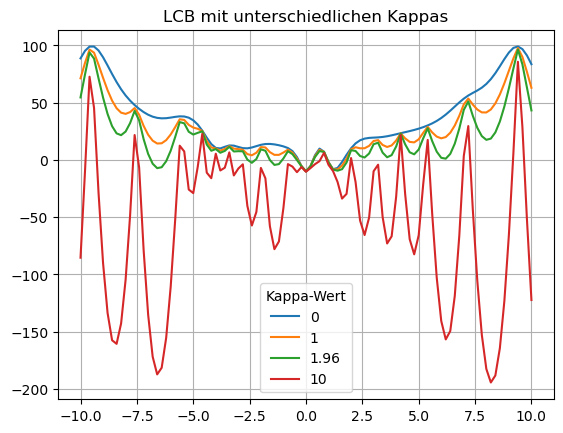

In [159]:
model = clone(opt.base_estimator_)
model.fit(opt.get_result().x_iters, opt.get_result().func_vals)

kappas = [0, 1, 1.96, 10]

fig, ax = plt.subplots()
ax.set_title("LCB mit unterschiedlichen Kappas")
ax.set_axisbelow(True)
ax.grid()
for k in kappas:
    ax.plot(xs, my_LCB(xs.reshape(101, 1), model, kappa=k))
ax.legend(title='Kappa-Wert', labels=['0', '1', '1.96', '10'])


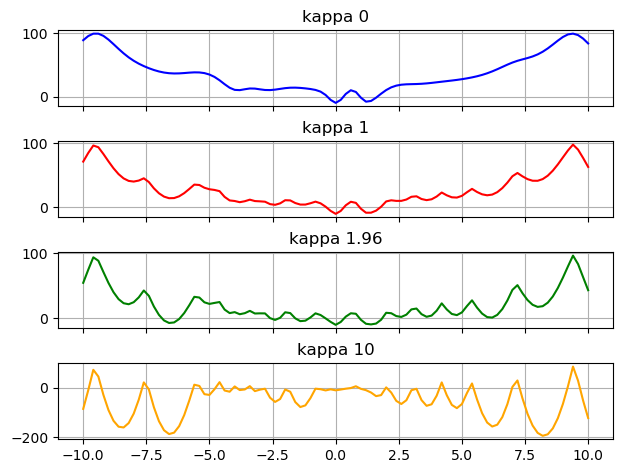

In [156]:
fig, ax = plt.subplots(4, sharex=True)
ax[0].set_axisbelow(True)
ax[0].grid()
ax[1].set_axisbelow(True)
ax[1].grid()
ax[2].set_axisbelow(True)
ax[2].grid()
ax[3].set_axisbelow(True)
ax[3].grid()
plt.tight_layout(pad=1.5)
colors = ['b', 'r', 'g', 'orange']
for i, k in enumerate(kappas):
    ax[i].plot(xs, my_LCB(xs.reshape(101, 1), model, kappa=k), c=colors[i])
    ax[i].set_title(f"kappa {k}")